# LSTM Stock Predictor Using Closing Prices

In this notebook, we will build and train a custom LSTM RNN that uses a 10 day window of chosen stock closing prices to predict the 11th day closing price. 

We will need to:

1. Prepare the data for training and testing
2. Build and train a custom LSTM RNN
3. Evaluate the performance of the model

## Data Preparation

In this section, we will need to prepare the training and testing data for the model. The model will use a rolling 10 day window to predict the 11th day closing price.

We will need to:
1. Use the `window_data` function to generate the X and y values for the model.
2. Split the data into 70% training and 30% testing
3. Apply the MinMaxScaler to the X and y values
4. Reshape the X_train and X_test data for the model. Note: The required input format for the LSTM is:

```python
reshape((X_train.shape[0], X_train.shape[1], 1))
```

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/draganbogatic/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Set the random seed for reproducibility
# Note: It is a good practice to run multiple experiments to evaluate model
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [3]:
# Load the historical closing prices for the stock
stock_df = pd.read_csv("Resources/stock_historical_prices.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)
stock_df = stock_df.sort_index()

stock_df.tail()

,Adj Close
Date,
2021-03-15,707.940002
2021-03-16,676.880005
2021-03-17,701.809998
2021-03-18,653.159973
2021-03-19,654.869995


In [5]:
# This function accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [6]:
# Predict Closing Prices using a 10 day window of previous closing prices
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 10

# Column index 0 is the `close` column
feature_column = 0
target_column = 0
X, y = window_data(stock_df, window_size, feature_column, target_column)

print (f"X sample values:\n{X[:5]} \n")
print (f"y sample values:\n{y[:5]}")

X sample values:
[[62.7120018  62.11000061 63.30599976 61.81999969 60.30799866 60.83599854
  55.83599854 51.55599976 53.22600174 50.49599838]
 [62.11000061 63.30599976 61.81999969 60.30799866 60.83599854 55.83599854
  51.55599976 53.22600174 50.49599838 53.50600052]
 [63.30599976 61.81999969 60.30799866 60.83599854 55.83599854 51.55599976
  53.22600174 50.49599838 53.50600052 57.38800049]
 [61.81999969 60.30799866 60.83599854 55.83599854 51.55599976 53.22600174
  50.49599838 53.50600052 57.38800049 61.14400101]
 [60.30799866 60.83599854 55.83599854 51.55599976 53.22600174 50.49599838
  53.50600052 57.38800049 61.14400101 59.86000061]] 

y sample values:
[[53.50600052]
 [57.38800049]
 [61.14400101]
 [59.86000061]
 [57.93199921]]


In [7]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [8]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
scaler = MinMaxScaler()
scaler.fit(X)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [9]:
# Reshape the features for the model
X_train = X_train_scaler.reshape((X_train_scaler.shape[0], X_train_scaler.shape[1], 1))
X_test = X_test_scaler.reshape((X_test_scaler.shape[0], X_test_scaler.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[0.0317693 ]
  [0.0310588 ]
  [0.03247035]
  [0.03071654]
  [0.02893204]
  [0.0295552 ]
  [0.02365407]
  [0.01860271]
  [0.02057369]
  [0.01735167]]

 [[0.0310588 ]
  [0.03247035]
  [0.03071654]
  [0.02893204]
  [0.0295552 ]
  [0.02365407]
  [0.01860271]
  [0.02057369]
  [0.01735167]
  [0.02090415]]

 [[0.03247035]
  [0.03071654]
  [0.02893204]
  [0.0295552 ]
  [0.02365407]
  [0.01860271]
  [0.02057369]
  [0.01735167]
  [0.02090415]
  [0.02548578]]

 [[0.03071654]
  [0.02893204]
  [0.0295552 ]
  [0.02365407]
  [0.01860271]
  [0.02057369]
  [0.01735167]
  [0.02090415]
  [0.02548578]
  [0.02991871]]

 [[0.02893204]
  [0.0295552 ]
  [0.02365407]
  [0.01860271]
  [0.02057369]
  [0.01735167]
  [0.02090415]
  [0.02548578]
  [0.02991871]
  [0.0284033 ]]] 

X_test sample values:
[[[0.13002776]
  [0.13365814]
  [0.135707  ]
  [0.13392958]
  [0.11985185]
  [0.13056594]
  [0.12431548]
  [0.12892306]
  [0.14629598]
  [0.13930197]]

 [[0.13365814]
  [0.135707  ]
  [0.133929

---

## Build and Train the LSTM RNN

In this section, we will design a custom LSTM RNN and fit (train) it using the training data.

Need to:
1. Define the model architecture
2. Compile the model
3. Fit the model to the training data

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [11]:
# Build the LSTM model. 
# The return sequences need to be set to True if we are adding additional LSTM layers, but 
# We don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

model = Sequential()

number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [12]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [13]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 30)            3840      
_________________________________________________________________
dropout (Dropout)            (None, 10, 30)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 30)            7320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 30)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [14]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended

model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=3, verbose=1)

Epoch 1/10
174/174 [==============================] - 4s 5ms/step - loss: 1.3044e-04
Epoch 2/10
174/174 [==============================] - 1s 5ms/step - loss: 7.0095e-04
Epoch 3/10
174/174 [==============================] - 1s 5ms/step - loss: 7.9258e-04
Epoch 4/10
174/174 [==============================] - 1s 5ms/step - loss: 9.7363e-04
Epoch 5/10
174/174 [==============================] - 1s 5ms/step - loss: 0.0012
Epoch 6/10
174/174 [==============================] - 1s 5ms/step - loss: 0.0013
Epoch 7/10
174/174 [==============================] - 1s 5ms/step - loss: 0.0014
Epoch 8/10
174/174 [==============================] - 1s 5ms/step - loss: 0.0015
Epoch 9/10
174/174 [==============================] - 1s 5ms/step - loss: 0.0015
Epoch 10/10
174/174 [==============================] - 1s 5ms/step - loss: 0.0014


---

## Model Performance

In this section, we will evaluate the model using the test data. 

Need to:
1. Evaluate the model using the `X_test` and `y_test` data.
2. Use the X_test data to make predictions
3. Create a DataFrame of Real (y_test) vs predicted values. 
4. Plot the Real vs predicted values as a line chart

### Hints
Remember to apply the `inverse_transform` function to the predicted and y_test values to recover the actual closing prices.

In [15]:
# Evaluate the model
model.evaluate(X_test, y_test)

7/7 [==============================] - 1s 3ms/step - loss: 0.2258


0.2257874459028244

In [16]:
# Make predictions
predicted = model.predict(X_test)

In [17]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [47]:
# Create a DataFrame of Real and Predicted values
stock = pd.DataFrame({"Real": real_prices.ravel(),"Predicted": predicted_prices.ravel()}, index = stock_df.index[-len(real_prices): ]) 
stock.iloc[-20:]

,Real,Predicted
Date,,
2021-02-22,781.299988,124.583801
2021-02-23,714.500000,124.561264
2021-02-24,698.840027,124.419678
2021-02-25,742.020020,124.233665
2021-02-26,682.219971,124.160820
2021-03-01,675.500000,124.006218
2021-03-02,718.429993,123.895149
2021-03-03,686.440002,123.962479
2021-03-04,653.200012,124.043121


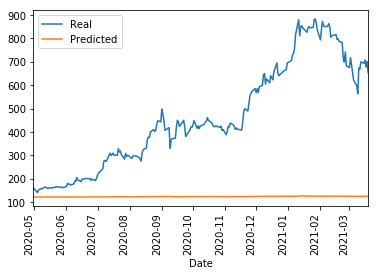

In [19]:
# Plot the real vs predicted values as a line chart
stock.plot(rot=90)

In [20]:
# In this case LSTM model is a poor predictor of future stock prices. We need to tweak hyperparameters and length of history and compare the results, to see if we can improve the model without overfitting.